In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model

In [3]:
a = np.arange(2000,2018)
pop = [str(i)+'Pop' for i in a]
investment = [str(i)+'总投资金额(M)' for i in a]
inv_times = [str(i)+'总投资次数' for i in a]
gdp = [str(i)+'GDP' for i in a]

Data =pd.read_excel('E:/vcdata/data/ALL_Intersection.xlsx')  # 读取训练数据
city=data['City'].drop_duplicates().values
City=data['city'].drop_duplicates().values

In [9]:
dataPOP=Data.iloc[:,3+27*5:21+27*5]###获取POP的数据
dataGDP=Data.iloc[:,22+27*5:40+27*5]###获取GDP的数据
dataAmount = Data.iloc[:,12:30]###投资金额
dataTimes = Data.iloc[:,12+27:30+27]###投资次数

In [10]:
dataTimes[0:1]

,2000总投资次数,2001总投资次数,2002总投资次数,2003总投资次数,2004总投资次数,2005总投资次数,2006总投资次数,2007总投资次数,2008总投资次数,2009总投资次数,2010总投资次数,2011总投资次数,2012总投资次数,2013总投资次数,2014总投资次数,2015总投资次数,2016总投资次数,2017总投资次数
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0


In [11]:
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
from matplotlib.ticker import FuncFormatter   ### 今天的主角

In [12]:
### 查看两者之间的关系 ###
def twoRE(data1,data2,name1,name2):
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(111)
    for i in range(data.shape[0]):
        x = data1[i:i+1]
        y = data2[i:i+1]
#         def formatnum(x, pos):
# #             return '$%.1f$x$10^{4}$' % (x/10000)
#             return '$%.0f$' % (x/10000)
#         formatter = FuncFormatter(formatnum)
# #         ax1.xaxis.set_major_formatter(formatter)
#         ax1.yaxis.set_major_formatter(formatter)
        plt.tick_params(labelsize=16) #刻度字体大小13
        plt.xlabel(name1,font2)
        plt.ylabel(name2,font2)
#         plt.text(-5000,115000,r'x$10^{4}$',size=14)
#         plt.text(10000,10,r'x$10^{4}$',size=14)
        plt.scatter(x,y)

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


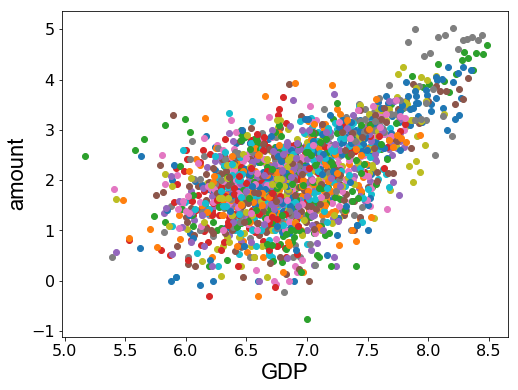

In [13]:
twoRE(np.log10(dataGDP),np.log10(dataAmount),'GDP','amount')

In [14]:
### 查看两者之间的关系 ###
def twoRESum(data1,data2,name1,name2):
#     fig = plt.figure(figsize=(8,6))
#     ax1 = fig.add_subplot(111)
    sum1= []###记录一个城市的总值
    sum2= []
    for i in range(data.shape[0]):
        x = data1[i:i+1].sum(axis=1).values[0]
        y = data2[i:i+1].sum(axis=1).values[0]
        sum1.append(x)
        sum2.append(y)
    return(sum1,sum2)
#     plt.scatter(sum1,sum2)
#     plt.xlabel(name1,font2)
#     plt.ylabel(name2,font2)

In [15]:
a = twoRESum(np.log10(dataGDP),np.log10(dataAmount),'GDP','amount')
len(a[0])

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


276

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


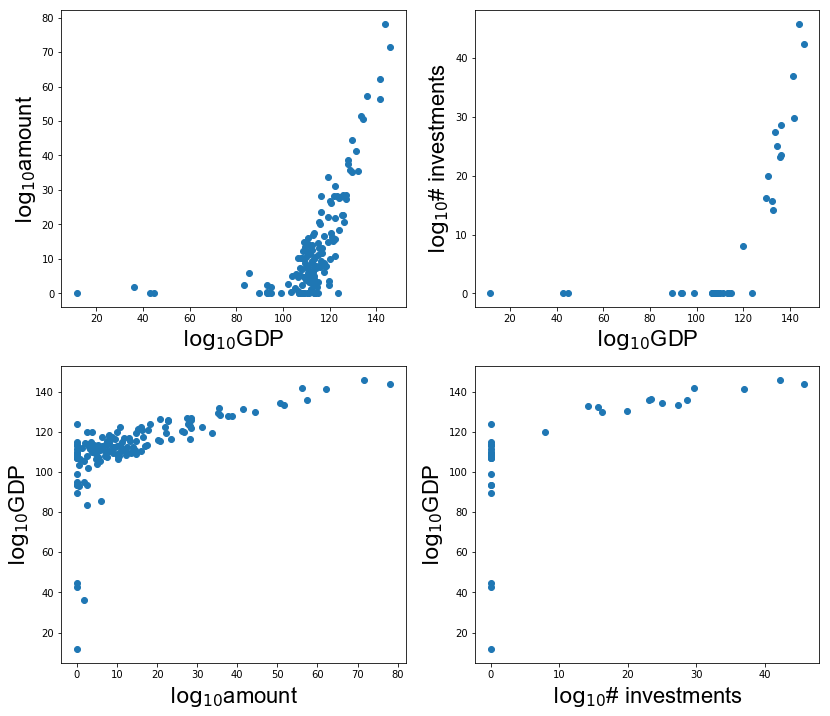

In [16]:
### sumGDP &sumAmount/sumTimes
fig = plt.figure(figsize=(21,12))
### 双log
plt.subplot(231)
a1 = twoRESum(np.log10(dataGDP),np.log10(dataAmount),'GDP','amount')
plt.scatter(a1[0],a1[1])
plt.xlabel('$\log_{10}$'+'GDP',font2)
plt.ylabel('$\log_{10}$'+'amount',font2)
plt.subplot(232)
b1 = twoRESum(np.log10(dataGDP),np.log10(dataTimes),'GDP','# investments')
plt.scatter(b1[0],b1[1])
plt.xlabel('$\log_{10}$'+'GDP',font2)
plt.ylabel('$\log_{10}$'+'# investments',font2)

plt.subplot(234)
a1 = twoRESum(np.log10(dataGDP),np.log10(dataAmount),'GDP','amount')
plt.scatter(a1[1],a1[0])
plt.ylabel('$\log_{10}$'+'GDP',font2)
plt.xlabel('$\log_{10}$'+'amount',font2)
plt.subplot(235)
b1 = twoRESum(np.log10(dataGDP),np.log10(dataTimes),'GDP','# investments')
plt.scatter(b1[1],b1[0])
plt.ylabel('$\log_{10}$'+'GDP',font2)
plt.xlabel('$\log_{10}$'+'# investments',font2)

plt.savefig('E:/vcdata/pic/picSC/0_figTwoLog.pdf', bbox_inches='tight')

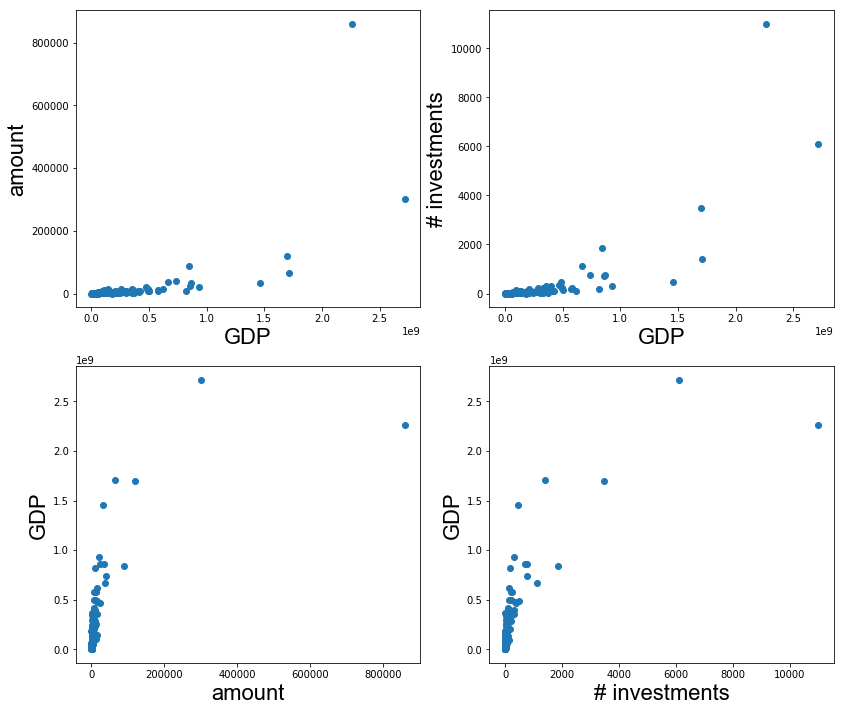

In [17]:
### sumGDP &sumAmount/sumTimes
fig = plt.figure(figsize=(21,12))
### 双log
plt.subplot(231)
A1 = twoRESum(dataGDP,dataAmount,'GDP','amount')
plt.scatter(A1[0],A1[1])
plt.xlabel('GDP',font2)
plt.ylabel('amount',font2)
plt.subplot(232)
B1 = twoRESum(dataGDP,dataTimes,'GDP','# investments')
plt.scatter(B1[0],B1[1])
plt.xlabel('GDP',font2)
plt.ylabel('# investments',font2)

plt.subplot(234)
# a1 = twoRESum(dataGDP,dataAmount,'GDP','amount')
plt.scatter(A1[1],A1[0])
plt.ylabel('GDP',font2)
plt.xlabel('amount',font2)
plt.subplot(235)
# b1 = twoRESum(dataGDP,dataTimes,'GDP','# investments')
plt.scatter(B1[1],B1[0])
plt.ylabel('GDP',font2)
plt.xlabel('# investments',font2)

plt.savefig('E:/vcdata/pic/picSC/0_figTwo.pdf', bbox_inches='tight')